In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Collecting Data
data_path = "/content/heart.csv"
df = pd.read_csv(data_path)
df.shape

(1025, 14)

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
import numpy as np
# keeping these columns: age, sex, chest pain type, maximum heart rate achieved,
# exercise induced angina,thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# Deleting the remaining Columns
to_drop =['trestbps','chol','fbs','restecg','oldpeak']
df.drop(to_drop,inplace=True, axis=1)
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target
0,52,1,0,168,0,2,2,3,0
1,53,1,0,155,1,0,0,3,0
2,70,1,0,125,1,0,0,3,0
3,61,1,0,161,0,2,1,3,0
4,62,0,0,106,0,1,3,2,0


In [8]:
# removing slope and number of major blood vessel columns
df.drop('slope',inplace=True, axis=1)
df.drop('ca',inplace=True, axis=1)

In [9]:
df.head()

,age,sex,cp,thalach,exang,thal,target
0,52,1,0,168,0,3,0
1,53,1,0,155,1,3,0
2,70,1,0,125,1,3,0
3,61,1,0,161,0,3,0
4,62,0,0,106,0,2,0


In [10]:
df.size

7175

In [11]:
# finding duplicate values
duplicateRowsDF = df[df.duplicated(['thalach'])]
print("Duplicate Rows with same cp and thalach :")
print(duplicateRowsDF)

Duplicate Rows with same cp and thalach :
      age  sex  cp  thalach  exang  thal  target
10     71    0   0      125      0     2       1
13     51    1   0      122      1     3       0
15     34    0   1      192      0     2       1
20     60    1   2      155      0     2       0
21     67    0   0      142      0     2       1
...   ...  ...  ..      ...    ...   ...     ...
1020   59    1   1      164      1     2       1
1021   60    1   0      141      1     3       0
1022   47    1   0      118      1     2       0
1023   50    0   0      159      0     2       1
1024   54    1   0      113      0     3       0

[934 rows x 7 columns]


In [12]:
df.size

7175

In [13]:
# removing all rows with talach value = 168
df1 = df.drop(df[df['thalach'] == 168].index, inplace = True)
df.size # hence 20 values get deleted as thalach ==168

7056

In [14]:
df.head()

,age,sex,cp,thalach,exang,thal,target
1,53,1,0,155,1,3,0
2,70,1,0,125,1,3,0
3,61,1,0,161,0,3,0
4,62,0,0,106,0,2,0
5,58,0,0,122,0,2,1


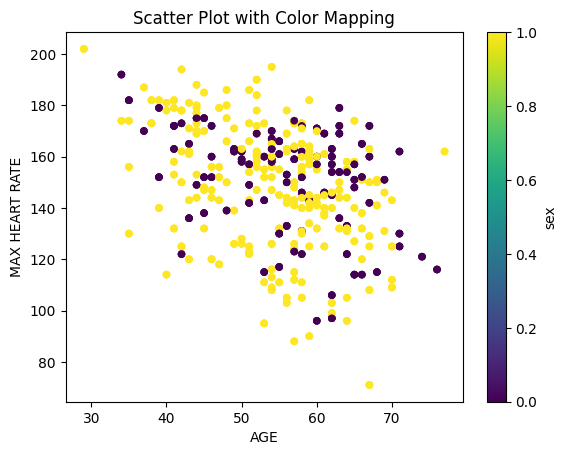

In [15]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter', x = 'age', y = 'thalach', c='sex',cmap='viridis') # finding maximum heartrate achieved for males and females
plt.title('Scatter Plot with Color Mapping')
plt.xlabel('AGE')
plt.ylabel('MAX HEART RATE')
plt.show()

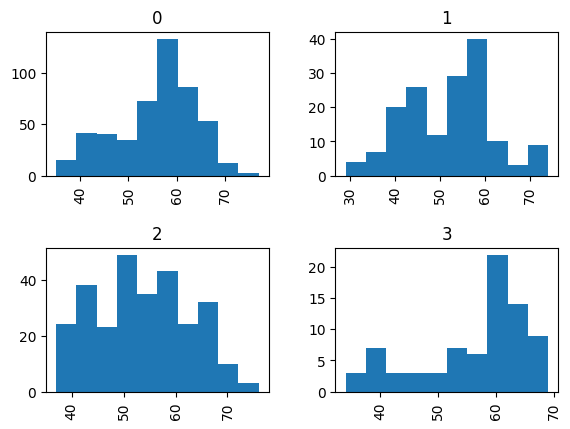

In [16]:
# plotting histogram for same data
df.hist(column='age',bins=10,by='cp') # showing how much chestpain for which ages
plt.show()

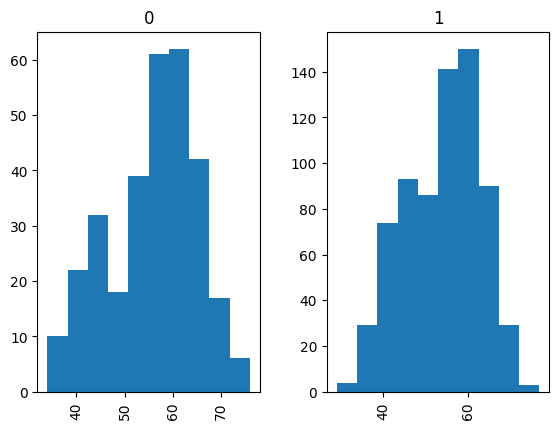

In [17]:
df.hist(column='age',bins=10,by='sex') # showing difference of when heart problems arise in men and women for which ages 1=malws, 0=fema
plt.show()

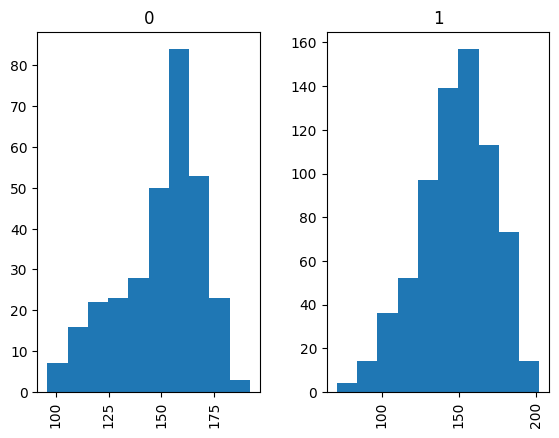

In [18]:
# plotting histogram for same data
df.hist(column='thalach',bins=10,by='sex') # showing how maximum heart rate for each sex
plt.show()